In [2]:
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import ioeddy as io 
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import cmocean
import palettable
import struct as st
from scipy import signal
import numpy, scipy.io


#os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'

fss = 12;
fsl = 15;

sns.set_context('paper')
sns.set(color_codes=True, font_scale=1.75)
#sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 3.0,
                        'xtick.minor.size': 1.5,
                        'ytick.major.size': 3.0,
                        'ytick.minor.size': 1.5,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})


plt.rc('figure', figsize=[8.0, 5.0])

plt.rc('mathtext', fontset='stix')

plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)

plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)
plt.rc('axes', titlesize=fss)

plt.rc('lines', linewidth=1.0)
plt.rc('lines', markersize=4.0)

plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)

plt.rc('font',**{'family':'serif','serif':['Times']})

plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])

import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import ioeddy as io 
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import cmocean
import palettable
import struct as st
from scipy import signal

#os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'

fss = 12;
fsl = 15;

sns.set_context('paper')
sns.set(color_codes=True, font_scale=1.75)
#sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 3.0,
                        'xtick.minor.size': 1.5,
                        'ytick.major.size': 3.0,
                        'ytick.minor.size': 1.5,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})


plt.rc('figure', figsize=[8.0, 5.0])

plt.rc('mathtext', fontset='stix')

plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)

plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)
plt.rc('axes', titlesize=fss)

plt.rc('lines', linewidth=1.0)
plt.rc('lines', markersize=4.0)

plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)

plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])


In [12]:
##............................Variables for SPOD.....................................

Nfreq = 512;
Novlp = 256;
N     = 7000;
stride = 100;
nstart = 2329600;
nend = nstart + (N-1)*stride;
nr = 333;
ntheta = 256;
numvar = 4;
Nblk = np.floor((N-Novlp)/(Nfreq-Novlp));
Nblk_sampled = 3;
Nfreq_sampled = 25;
Nrows = numvar*nr*ntheta;

In [17]:
##........................Locations where SPOD modes are stored............................

x = np.array([10, 15, 20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])

18


In [18]:
###.......................Reading the modes at different frequencies.....................................


for l in range(0,np.size(x)):
    path = '/home/sheel/Work2/projects_data/spod_re5e4/fr2/spod_data/run_3.0/x_D_' + str(x[l]) + '/eigenmodes/'

    file_header = 'eigenmode_freq_' 

    real_mode    = np.zeros((Nrows, Nblk_sampled, nit_freq))
    imag_mode    = np.zeros((Nrows, Nblk_sampled, nit_freq))
    real_mode_2d = np.zeros((nr_spod, ntheta, numvar, Nblk_sampled, nit_freq))
    imag_mode_2d = np.zeros((nr_spod, ntheta, numvar, Nblk_sampled, nit_freq))

    for m in range(0, Nblk_sampled):
        for i in range(0, nit_freq):        
        
            freq_num = i + nfreq_start
            mode_num = Nblk - m
            filename_real   =  path + file_header + '%04d'%freq_num + '_' + '%02d'%mode_num  + '_real.mod'
            filename_imag   =  path + file_header + '%04d'%freq_num + '_' + '%02d'%mode_num  + '_imag.mod'

            print(filename_real)
            print(filename_imag)
    
            a = open(filename_real,"rb")
            data = a.read()
            a.close()
            real_mode[:,j,i] = np.frombuffer(data[4:-4], dtype='float64')
        
            a = open(filename_imag,"rb")
            data = a.read()
            a.close()
            imag_mode[:,j,i] = np.frombuffer(data[4:-4], dtype='float64')
        
            # Reshape the arrays in the proper shape

            print('Shape of real_mode_2d', np.shape(real_mode))
            print('Shape of imag_mode_2d', np.shape(imag_mode))

            real_mode_2d = np.reshape(real_mode, (nr_spod, ntheta, numvar, Nblk_sampled, nit_freq), order = 'F')
            imag_mode_2d = np.reshape(imag_mode, (nr_spod, ntheta, numvar, Nblk_sampled, nit_freq), order = 'F')               


            del real_mode
            del imag_mode

    print('Shape of real_mode_2d', np.shape(real_mode_2d))
    print('Shape of imag_mode_2d', np.shape(imag_mode_2d))
    print(np.amin(real_mode_2d)), print(np.amax(real_mode_2d))
    print(np.amin(imag_mode_2d)), print(np.amax(imag_mode_2d))
    eigmodes = real_mode_2d + 1j*imag_mode_2d
    scipy.io.savemat('./'+'eigenmodes_x_D_' + str(x[l]) + '.mat' , mdict={'eigmodes': eigmodes}, mdict={'Nfreq_sampled': Nfreq_sampled}, mdict={'Nblk_sampled': Nblk_sampled})

SyntaxError: invalid syntax (<ipython-input-18-b5e0bd62d012>, line 4)

In [7]:
####......................Reading the grid file............................

nx, index, x, xe, xc = io.readgrid('/home/sheel/Work/projects/spod_re5e4/grid/fr2/x3_grid.in')
nr, index, r, re, rc = io.readgrid('/home/sheel/Work/projects/spod_re5e4/grid/fr2/x1_grid.in')
ntheta = 258
nr_trunc = nr - 10 + 1 - 2
rc = rc[1:-11]
rc = rc[1:nr_spod+1]

print("Number of grid points in x direction", nx)
print("Number of grid points in r direction", nr)
print("Number of grid points in theta direction", ntheta)
print(np.shape(rc))

Number of grid points in x direction 4609
Number of grid points in r direction 530
Number of grid points in theta direction 258
(333,)


In [8]:
###..................Creating the meshgrid...................................................

v = 5
idx = (np.abs(v - rc)).argmin()
print(idx)

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta-2) 
R, THETA = np.meshgrid(rc[0:idx],azimuths)

R = R.T
THETA = THETA.T

print(R.shape)
print(THETA.shape)

254
(254, 256)
(254, 256)


In [9]:
###.........................................Creating the meshgrid.....................................

v = 25
idx = (np.abs(v - rc)).argmin()
print(idx)

azimuths = np.linspace(-(0.5)*2*np.pi/(ntheta-2),2*np.pi+0.5*2*np.pi/(ntheta-2) , ntheta-2) 
R, THETA = np.meshgrid(rc[0:idx],azimuths)

R = R.T
THETA = THETA.T

print(R.shape)
print(THETA.shape)

332
(332, 256)
(332, 256)


Shape of mode (333, 256)
Minval of mode -0.3651182282019439
Maxval of mode 0.29123846266857417


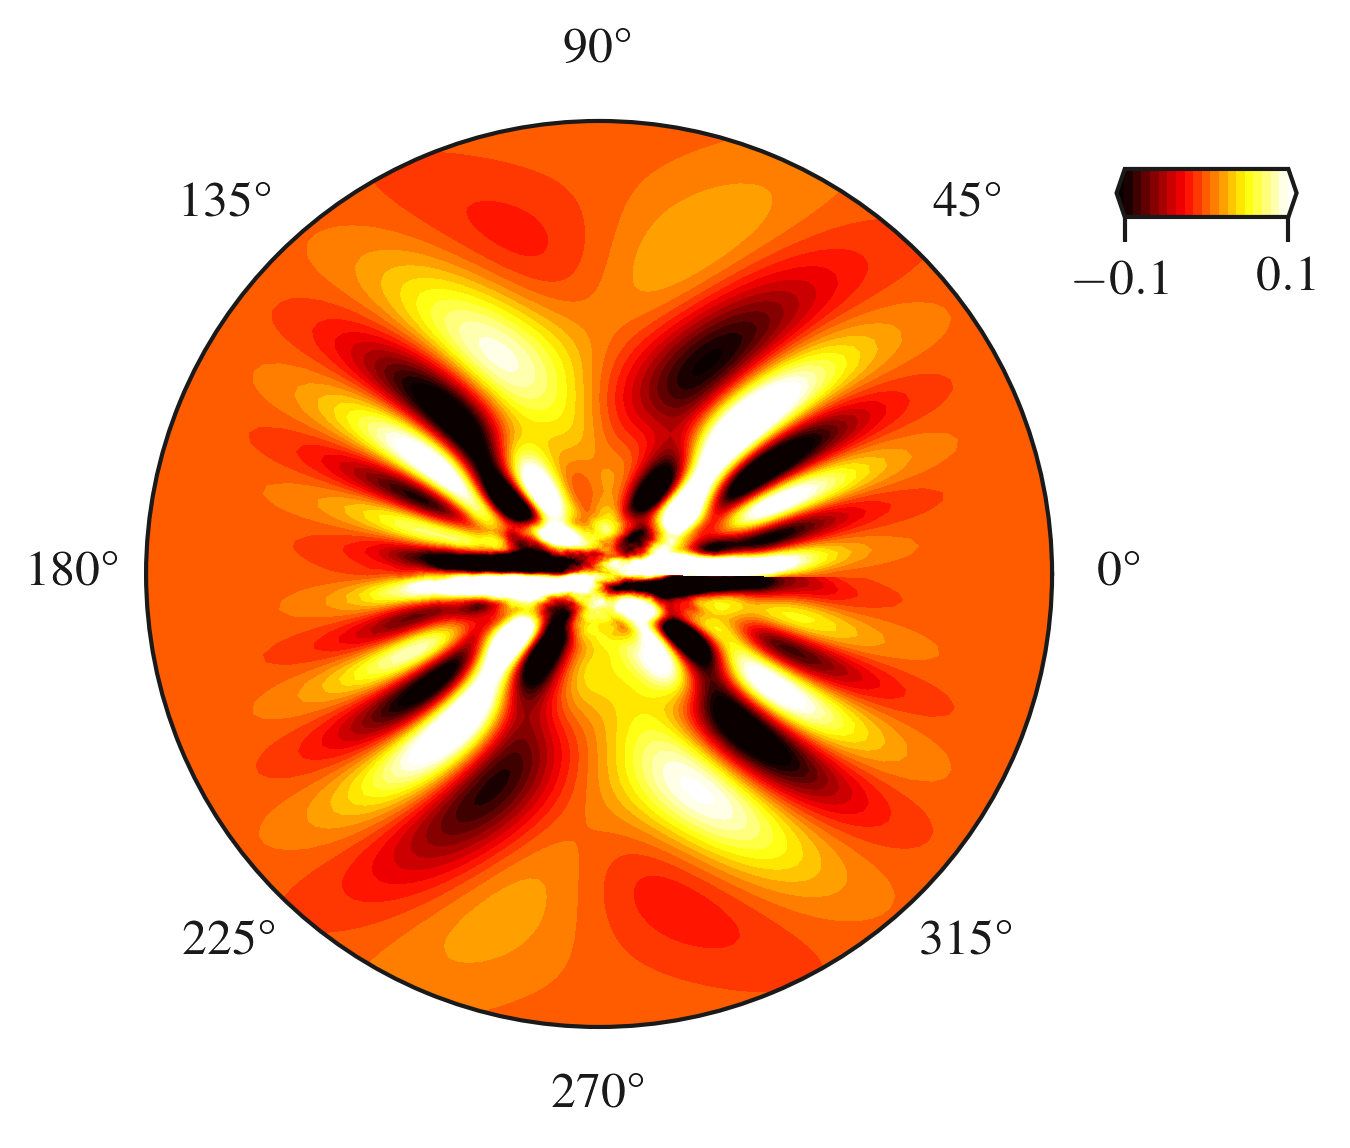

In [14]:
mode = real_mode_2d[:,:,3,0,6]
# mode = imag_mode_2d[:,:,0,0,0]
# mode = mode.T

print('Shape of mode', mode.shape)
print('Minval of mode', np.amin(mode))
print('Maxval of mode', np.amax(mode))

#fig = plt.figure(dpi=300)
fig, ax1 = plt.subplots(subplot_kw=dict(projection='polar'), dpi = 300)
cs1 = ax1.contourf(THETA, R, mode[0:idx,:], cmap = 'hot', levels=np.linspace(-0.1,0.1,20), extend = 'both')
cbaxes = fig.add_axes([0.8, 0.8, 0.1, 0.04])
plt.colorbar(cs1,cax = cbaxes,orientation = 'horizontal', ticks = [-0.1,0.1])
ax1.set_aspect(1.0)
plt.show()
# fig.savefig('dens_4var_nblk1_freq_0008_x_D_60.png', bbox_inches = 'tight')

Shape of mode (333, 256)
Minval of mode -0.38213733649347986
Maxval of mode 0.35475988566336464


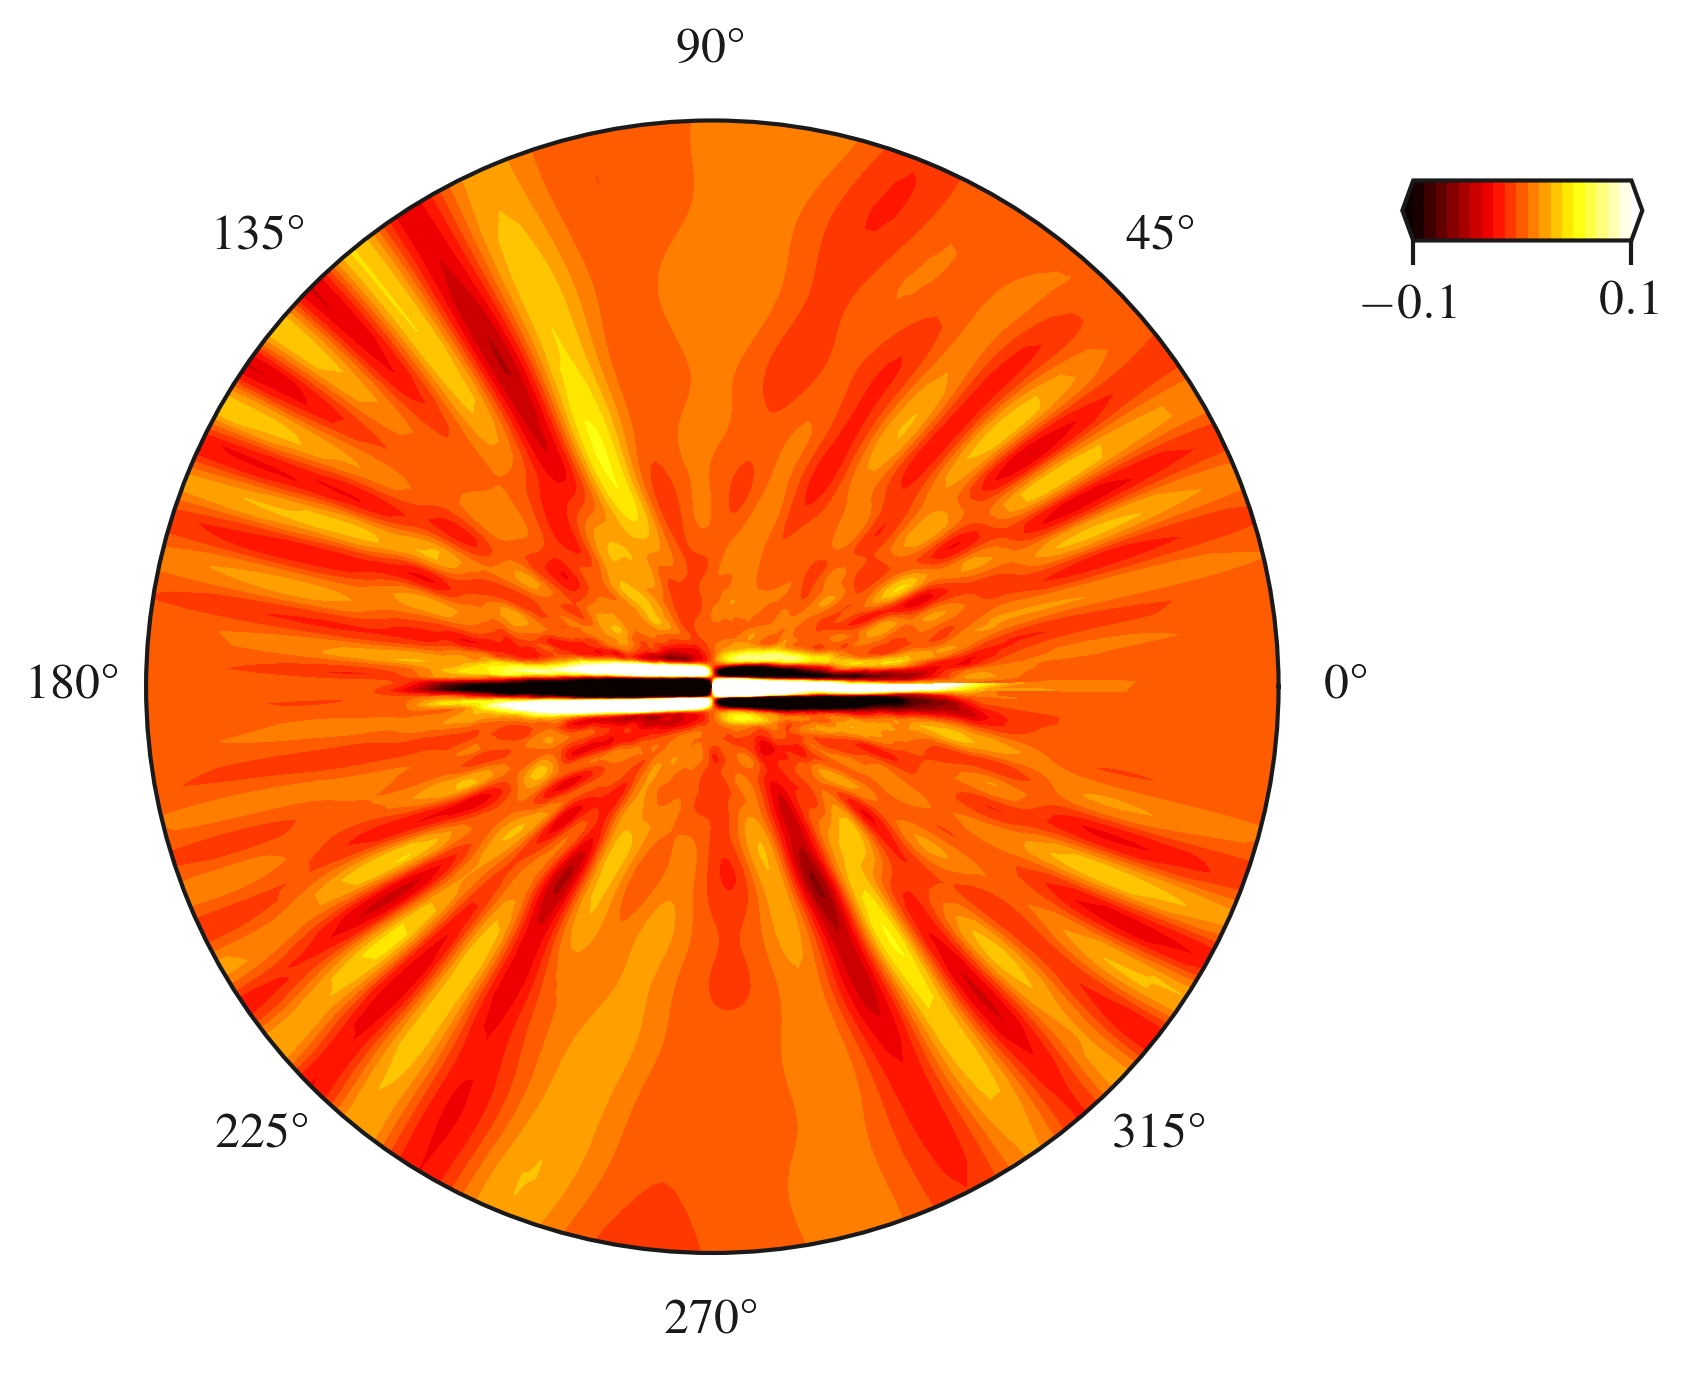

In [81]:
mode = real_mode_2d[:,:,0,0,6]
# mode = imag_mode_2d[:,:,0,0,0]
# mode = mode.T

print('Shape of mode', mode.shape)
print('Minval of mode', np.amin(mode))
print('Maxval of mode', np.amax(mode))

#fig = plt.figure(dpi=300)
fig, ax1 = plt.subplots(subplot_kw=dict(projection='polar'), dpi = 300)
cs1 = ax1.contourf(THETA, R, mode[0:idx,:], cmap = 'hot', levels=np.linspace(-0.1,0.1,20), extend = 'both')
cbaxes = fig.add_axes([0.8, 0.8, 0.1, 0.04])
plt.colorbar(cs1,cax = cbaxes,orientation = 'horizontal', ticks = [-0.1,0.1])
ax1.set_aspect(1.0)
plt.show()
# fig.savefig('dens_4var_nblk1_freq_0008_x_D_60.png', bbox_inches = 'tight')